In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Aquisition

In [5]:
#Load the dataset

data = pd.read_csv(r'D:\Store-Sales-Forecasting\data\stores_sales_forecasting.csv', encoding='ISO-8859-1')

In [6]:
data.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
3       6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   
4      11  CA-2014-115812    6/9/2014   6/14/2014  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID   Category Sub-Category  \
0   South  FUR-BO-10001798  Furniture    Bookcases   
1   South  FUR-CH-10000454  Furniture       Chairs   
2   South  FUR-TA-10000577  Furniture       Tables   
3    West  FUR-FU-10001487  Furniture  Furnishings   
4    West  FUR-TA-10001539  Furniture       Tables   

                                        Product Name      Sales  Quantity  \
0                  Bush Somerset Collection Bookcase   261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...   731.9400         3   
2      Bretford CR4500 Series Slim Rectangular Table   957.5775         5   
3  Eldon Expressions Wood and Plastic Desk Access...    48.8600         7   
4           Chromcraft Rectangular Conference Tables  1706.1840         9   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.45 -383.0310  
3      0.00   14.1694  
4      0.20   85.3092  

[5 rows x 21 columns]

In [7]:
#check for missing values

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

Row ID   Postal Code        Sales     Quantity     Discount  \
count  2121.000000   2121.000000  2121.000000  2121.000000  2121.000000   
mean   5041.643564  55726.556341   349.834887     3.785007     0.173923   
std    2885.740258  32261.888225   503.179145     2.251620     0.181547   
min       1.000000   1040.000000     1.892000     1.000000     0.000000   
25%    2568.000000  22801.000000    47.040000     2.000000     0.000000   
50%    5145.000000  60505.000000   182.220000     3.000000     0.200000   
75%    7534.000000  90032.000000   435.168000     5.000000     0.300000   
max    9991.000000  99301.000000  4416.174000    14.000000     0.700000   

            Profit  
count  2121.000000  
mean      8.699327  
std     136.049246  
min   -1862.312400  
25%     -12.849000  
50%       7.774800  
75%      33.726600  
max    1013.127000

## Data Cleaning

In [8]:
#We can see the order date and Ship date is Object type, we can convert it to datetime

data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce')


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [10]:
#From the summary statistics, we have some extreme values in the "Sales" and "Profit" columns .
#We can check for outliers and decide whether to keep, cap, or remove them. 

# Identify outliers using IQR or Z-score
# For example, using IQR method for Sales column:

Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Sales'] >= (Q1 - 1.5 * IQR)) & (data['Sales'] <= (Q3 + 1.5 * IQR))]


In [11]:
# Remove rows with negative profit if it's erroneous

data = data[data['Profit'] >= 0]

In [12]:
# Check for duplicates

print(data.duplicated().sum())

0


In [13]:
#check for all postal codes to be numeric

print(data['Postal Code'].unique()) 

[42420 90032 19140 47150 12180 90004 38109 29203 55407 10009 10035 98103
 19805 95661 43055 98115 37064 43017 48227 38401 33614 94109 80906  7109
 10024 80004  7601 37130 98105  1841 39212 48187 47201 85023 94110 92627
 80134 64118 48234 33801 90036 32216 40475 92024 10011 48126 31088 98661
 44105 22980 19901 84057 11572 48183 33710 22204 50315 93534 23223 92530
 92105 94122 68104 92704 41042 40214 44052 22153  3301 14609  6360 53209
 19120 19143 92054 19134 80027 13021 92037 98502 65109 63376 28110 90049
 72401 90045 44221 22801 20852 33065 80219 33437 93727 19013 46350 31907
 90008 90660 84604 30080  6457 85705 18103 92677  2149 43229 98031 70506
 20016 94601 23434 95123 98002 97756 74403 28205 42104 80013 89015 99207
 97477 13601 80020 36116 85301 94513 36830  2908 55901 85345 47374 56560
 92374 48911  3820 94521 45231 72209 17602  4401 38671 30076 57103  2038
 78207  1040 87401 28314 46544  7090 85254  2148 47905 22304 27604 74133
 92345 85234  1852 33012 44107 19711 33311 33068 88

## Feature engineering

In [16]:
# Extract the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)

data['Day of the Week'] = data['Order Date'].dt.dayofweek

In [17]:
# Extract Month from 'Order Date'

data['Month']=data['Order Date'].dt.month

In [18]:
# Extract the quarter from 'Order Date'

data['Quarter'] = data['Order Date'].dt.quarter

In [19]:
# Define a function to categorize months into seasons

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create the 'Season' column
data['Season'] = data['Month'].apply(get_season)

In [28]:
# Extract the day of the year
data['Day of Year'] = data['Order Date'].dt.dayofyear

In [26]:
# Shift the 'Sales' column to create a feature for previous day's sales
data['Prev Day Sales'] = data['Sales'].shift(1)


#### Rolling features like the moving average of sales over the last 7 days can help capture trends.

In [29]:
# Calculate 7-day rolling mean for sales
data['7-Day Moving Avg Sales'] = data['Sales'].rolling(window=7).mean()

## Data Visualization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

#### To get Line plot showing sales over time.

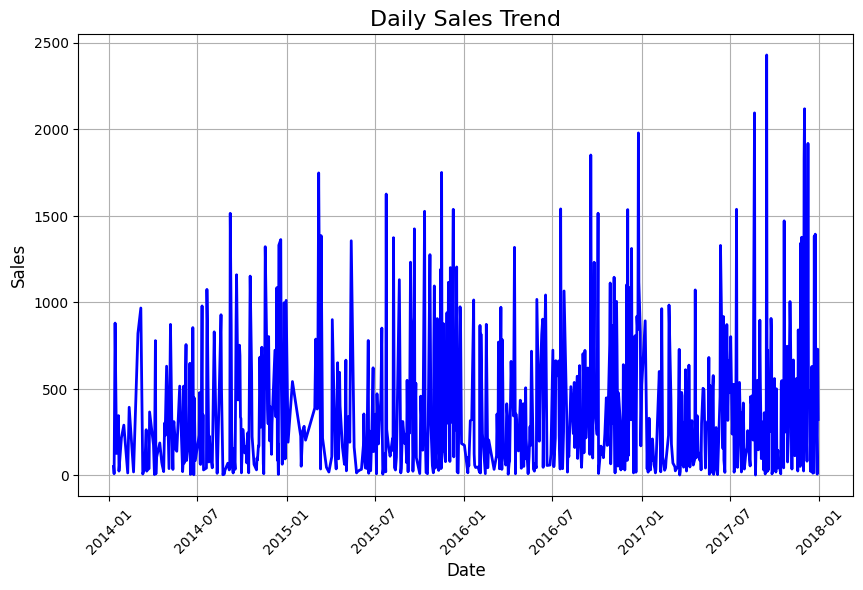

In [32]:
# Group the data by 'Order Date' and sum the sales
daily_sales = data.groupby('Order Date')['Sales'].sum().reset_index()

# Plot the sales trend over time (daily)
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], color='blue', linewidth=2)
plt.title('Daily Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### To see monthly trends we can group the data by month and year

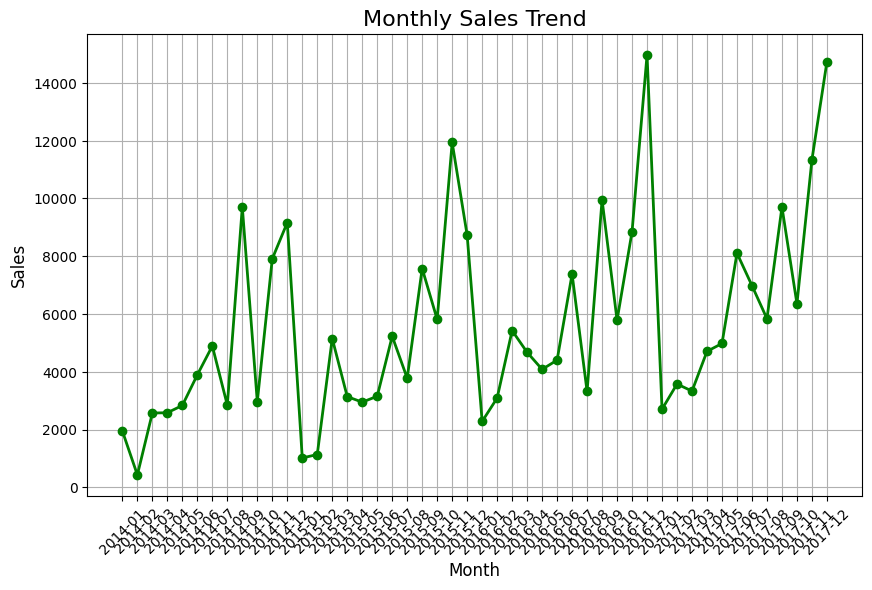

In [34]:
# Create a 'Year-Month' column
data['Year-Month'] = data['Order Date'].dt.to_period('M')

# Group by 'Year-Month' and sum the sales
monthly_sales = data.groupby('Year-Month')['Sales'].sum().reset_index()

# Plot the sales trend over time (monthly)
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Year-Month'].astype(str), monthly_sales['Sales'], marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### To see sales trends by year,we can group the data by year.

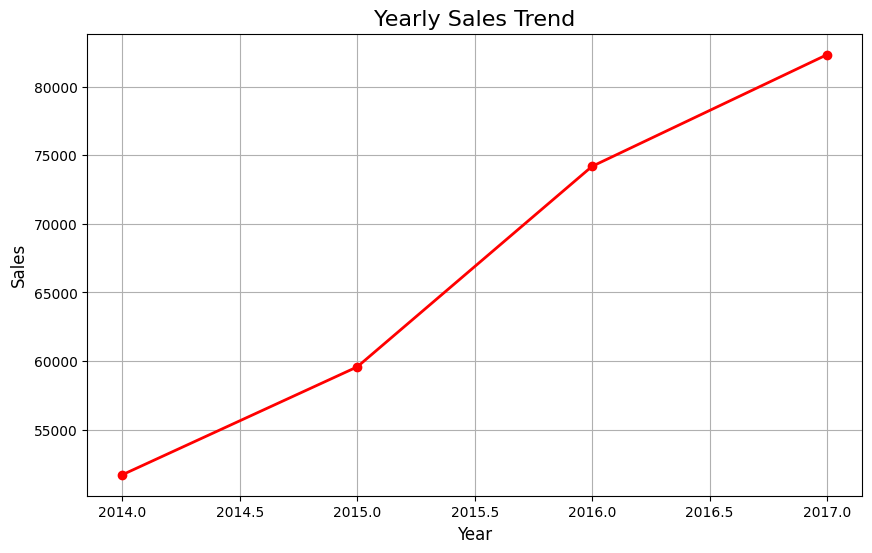

In [35]:
# Extract the year from 'Order Date'
data['Year'] = data['Order Date'].dt.year

# Group by 'Year' and sum the sales
yearly_sales = data.groupby('Year')['Sales'].sum().reset_index()

# Plot the sales trend over time (yearly)
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['Year'], yearly_sales['Sales'], marker='o', color='red', linestyle='-', linewidth=2)
plt.title('Yearly Sales Trend', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True)
plt.show()


### To see sales patterns by season or even by month of the year using heatmaps or bar plots.

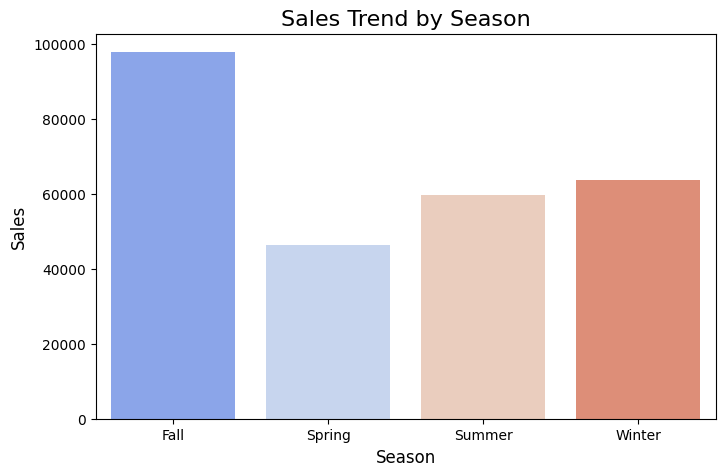

In [37]:
# Group by 'Season' and sum the sales
seasonal_sales = data.groupby('Season')['Sales'].sum().reset_index()

# Plot seasonal sales
plt.figure(figsize=(8, 5))
sns.barplot(x='Season', y='Sales', data=seasonal_sales, hue='Season', palette='coolwarm')
plt.title('Sales Trend by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()


### To check Sales Distribution using Histogram

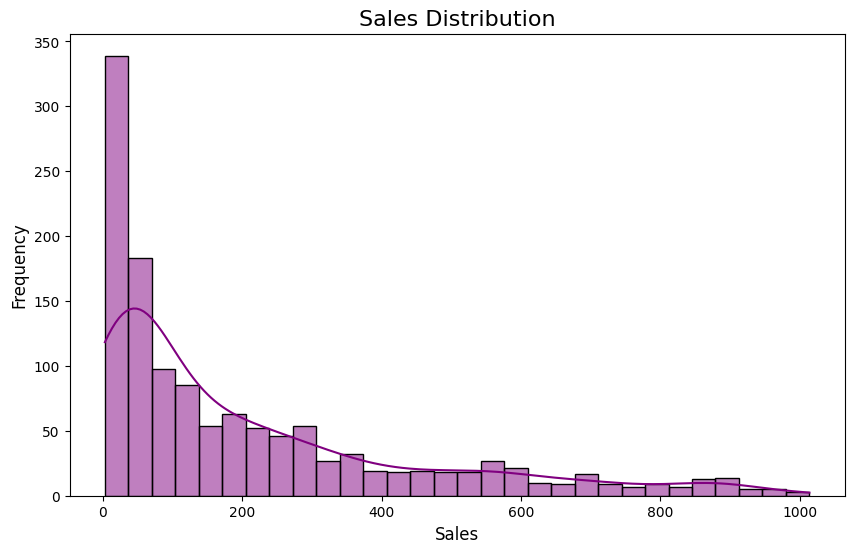

In [38]:
# Plot histogram of sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=30, kde=True, color='purple')
plt.title('Sales Distribution', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [39]:
### We can see sales vs. quantity using scatterplot

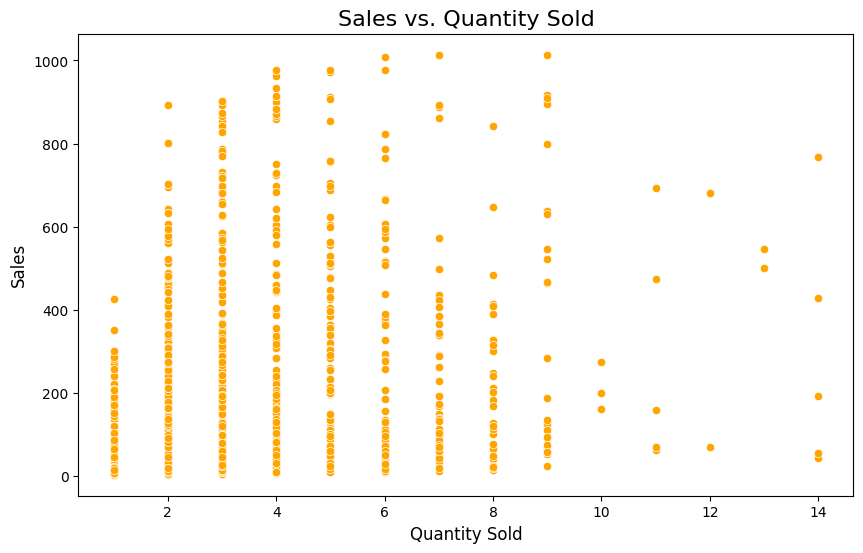

In [40]:
# Scatter plot of Sales vs. Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Sales', data=data, color='orange')
plt.title('Sales vs. Quantity Sold', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()


## Model Building

In [41]:
#Split the data into training and testing sets. 

from sklearn.model_selection import train_test_split
X = data.drop(columns=['Sales'])  # Features
y = data['Sales']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [44]:
# Check for missing values in the features and target variable
print(X_train.isnull().sum())  # Check missing values in features
print(y_train.isnull().sum())  # Check missing values in target


Row ID                    0
Order ID                  0
Order Date                0
Ship Date                 0
Ship Mode                 0
Customer ID               0
Customer Name             0
Segment                   0
Country                   0
City                      0
State                     0
Postal Code               0
Region                    0
Product ID                0
Category                  0
Sub-Category              0
Product Name              0
Quantity                  0
Discount                  0
Profit                    0
Day of the Week           0
Month                     0
Quarter                   0
Season                    0
Day of Year               0
Prev Day Sales            1
7-Day Moving Avg Sales    6
Year-Month                0
Year                      0
dtype: int64
0


In [46]:
#We can impute missing values using the mean

X_train['Prev Day Sales'].fillna(X_train['Prev Day Sales'].mean())
X_train['7-Day Moving Avg Sales'].fillna(X_train['7-Day Moving Avg Sales'].mean())


0       214.764023
1       214.764023
3       214.764023
8       214.764023
12      214.764023
           ...    
1653    107.812286
1654    114.504857
1660    155.500571
1662    256.542000
1665    254.098571
Name: 7-Day Moving Avg Sales, Length: 1024, dtype: float64

In [47]:
# we will use Linear regression model

In [49]:
print(X_train.dtypes)


Row ID                             int64
Order ID                          object
Order Date                datetime64[ns]
Ship Date                 datetime64[ns]
Ship Mode                         object
Customer ID                       object
Customer Name                     object
Segment                           object
Country                           object
City                              object
State                             object
Postal Code                        int64
Region                            object
Product ID                        object
Category                          object
Sub-Category                      object
Product Name                      object
Quantity                           int64
Discount                         float64
Profit                           float64
Day of the Week                    int32
Month                              int32
Quarter                            int32
Season                            object
Day of Year     

In [60]:
print(X_train.dtypes)

Row ID           int64
Postal Code      int64
Quantity         int64
Discount       float64
Profit         float64
                ...   
Order Month      int32
Order Day        int32
Ship Year        int32
Ship Month       int32
Ship Day         int32
Length: 2958, dtype: object


In [62]:
X_train = pd.get_dummies(X_train, drop_first=True)

In [64]:

print(X_train[['Order Day', 'Order Month', 'Order Year', 'Ship Day', 'Ship Month', 'Ship Year']].head())



    Order Day  Order Month  Order Year  Ship Day  Ship Month  Ship Year
0           8           11        2016        11          11       2016
1           8           11        2016        11          11       2016
3           9            6        2014        14           6       2014
8          17            9        2015        21           9       2015
12         18            4        2015        22           4       2015


In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


TypeError: Cannot cast PeriodArray to dtype float64

In [67]:
print(X_train.dtypes)

Row ID           int64
Postal Code      int64
Quantity         int64
Discount       float64
Profit         float64
                ...   
Order Month      int32
Order Day        int32
Ship Year        int32
Ship Month       int32
Ship Day         int32
Length: 2958, dtype: object


In [68]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')

In [69]:
print(X_train.dtypes)

Row ID           int64
Postal Code      int64
Quantity         int64
Discount       float64
Profit         float64
                ...   
Order Month      int32
Order Day        int32
Ship Year        int32
Ship Month       int32
Ship Day         int32
Length: 2958, dtype: object


In [70]:
X_train = X_train.fillna(0)

In [71]:
model.fit(X_train, y_train)


LinearRegression()

In [72]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Before Evaluating the model, we will check certain issues, like if there is equal number of columns in both test and train dataset

In [78]:
print(X_train.columns)
print(X_test.columns)

Index(['Row ID', 'Postal Code', 'Quantity', 'Discount', 'Profit',
       'Day of the Week', 'Month', 'Quarter', 'Day of Year', 'Prev Day Sales',
       ...
       'Product Name_Westinghouse Mesh Shade Clip-On Gooseneck Lamp, Black',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Order Year',
       'Order Month', 'Order Day', 'Ship Year', 'Ship Month', 'Ship Day'],
      dtype='object', length=2958)
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit', 'Day of the Week',
       'Month', 'Quarter', 'Season', 'Day of Year', 'Prev Day Sales',
       '7-Day Moving Avg Sales', 'Year-Month', 'Year'],
      dtype='object')


In [79]:
# Ensure the columns match
missing_in_train = [col for col in ['Category', 'City', 'Country'] if col not in X_train.columns]
missing_in_test = [col for col in ['Category', 'City', 'Country'] if col not in X_test.columns]

print(f"Missing columns in X_train: {missing_in_train}")
print(f"Missing columns in X_test: {missing_in_test}")


Missing columns in X_train: ['Category', 'City', 'Country']
Missing columns in X_test: []


In [80]:
# Assuming you have access to the original dataset or have the columns in 'X_test'
# You can either add them manually, or use 'X_test' to get the columns:
X_train[['Category', 'City', 'Country']] = X_test[['Category', 'City', 'Country']].iloc[:len(X_train)]


In [81]:
# Ensure columns are aligned
print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)


Columns in X_train: Index(['Row ID', 'Postal Code', 'Quantity', 'Discount', 'Profit',
       'Day of the Week', 'Month', 'Quarter', 'Day of Year', 'Prev Day Sales',
       ...
       'Season_Winter', 'Order Year', 'Order Month', 'Order Day', 'Ship Year',
       'Ship Month', 'Ship Day', 'Category', 'City', 'Country'],
      dtype='object', length=2961)
Columns in X_test: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit', 'Day of the Week',
       'Month', 'Quarter', 'Season', 'Day of Year', 'Prev Day Sales',
       '7-Day Moving Avg Sales', 'Year-Month', 'Year'],
      dtype='object')


In [109]:
# Get the common columns between X_train and X_test
common_columns = X_train.columns.intersection(X_test.columns)

# Keep only the common columns in X_train and X_test
X_train = X_train[common_columns]
X_test = X_test[common_columns]
print (X_train,X_test)


      Row ID  Postal Code  Quantity  Discount    Profit  Prev Day Sales  \
542   2615.0      90049.0       3.0      0.20   23.0280          41.568   
1166  5638.0      48126.0       3.0      0.00   23.1192           6.160   
857   4060.0      94601.0       3.0      0.20   35.7600         172.764   
1960  9268.0      11520.0       1.0      0.10    6.8388          14.560   
1958  9263.0      48227.0       3.0      0.00   35.0973         332.940   
...      ...          ...       ...       ...       ...             ...   
1700  8039.0      90032.0       3.0      0.15    5.1294         210.680   
1797  8448.0       2920.0       2.0      0.00   50.5632          35.000   
1866  8777.0      77340.0       5.0      0.30    0.0000          83.136   
1374  6566.0       1841.0       4.0      0.00  244.2496         327.564   
1862  8743.0      97123.0       1.0      0.20    3.0338         126.300   

      7-Day Moving Avg Sales  
542                81.031714  
1166               88.598286  
857   

In [84]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder on the training data and transform both training and testing data
X_train_encoded = encoder.fit_transform(X_train[['Category', 'City', 'Country']])
X_test_encoded = encoder.transform(X_test[['Category', 'City', 'Country']])

# Convert encoded data into DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['Category', 'City', 'Country']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['Category', 'City', 'Country']))

# Drop original columns and concatenate the encoded columns
X_train = pd.concat([X_train.drop(columns=['Category', 'City', 'Country']), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=['Category', 'City', 'Country']), X_test_encoded_df], axis=1)


ValueError: Found unknown categories ['Furniture'] in column 0 during transform

In [85]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder with handle_unknown='ignore'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the training data and transform both training and testing data
X_train_encoded = encoder.fit_transform(X_train[['Category', 'City', 'Country']])
X_test_encoded = encoder.transform(X_test[['Category', 'City', 'Country']])

# Convert encoded data into DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(['Category', 'City', 'Country']))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(['Category', 'City', 'Country']))

# Drop original columns and concatenate the encoded columns
X_train = pd.concat([X_train.drop(columns=['Category', 'City', 'Country']), X_train_encoded_df], axis=1)
X_test = pd.concat([X_test.drop(columns=['Category', 'City', 'Country']), X_test_encoded_df], axis=1)


### Check the shape of both the training and testing set, if there is any dataset which is empty or 0 samples, we need to fix it 

In [91]:
print(f"Initial shape of X_train: {X_train.shape}")
print(f"Initial shape of X_test: {X_test.shape}")

Initial shape of X_train: (636, 16)
Initial shape of X_test: (0, 16)


##### Possible reasons behind 0 samples can be:
##### Data Splitting Issue: When splitting the data into training and test sets, it's possible that there was a problem in the splitting process, such as an incorrect or empty dataset being used for X_test.
##### Data Preprocessing Issue: Some preprocessing steps (e.g., dropping columns or rows) might have removed all rows from the X_test set.

In [92]:
from sklearn.model_selection import train_test_split

# Assuming you have X and y already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")


Shape of X_train: (1024, 29)
Shape of X_test: (257, 29)


In [93]:
print(f"X_test head: \n{X_test.head()}")


X_test head: 
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
2057    9707  CA-2016-161746 2016-10-21 2016-10-27  Standard Class   
1227    5884  CA-2016-136301 2016-03-13 2016-03-15    Second Class   
2019    9533  CA-2016-116596 2016-10-27 2016-10-31  Standard Class   
1242    5960  CA-2016-127138 2016-03-12 2016-03-15    Second Class   
1079    5231  CA-2017-124436 2017-03-19 2017-03-22    Second Class   

     Customer ID   Customer Name    Segment        Country           City  \
2057    CS-11950  Carlos Soltero   Consumer  United States    Los Angeles   
1227    EH-13765    Edward Hooks  Corporate  United States  San Francisco   
2019    BW-11200     Ben Wallace   Consumer  United States  New York City   
1242    DK-13225       Dean Katz  Corporate  United States  San Francisco   
1079    SA-20830    Sue Ann Reed   Consumer  United States         Fresno   

      ...   Profit  Day of the Week Month Quarter  Season Day of Year  \
2057  ...  12.1068           

In [94]:
# Re-split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (1024, 29)
Shape of X_test: (257, 29)


In [97]:
# Separate the columns into numeric and categorical
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Numeric Columns: Index(['Row ID', 'Postal Code', 'Quantity', 'Discount', 'Profit',
       'Prev Day Sales', '7-Day Moving Avg Sales'],
      dtype='object')
Categorical Columns: Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Season'],
      dtype='object')


In [98]:
from sklearn.impute import SimpleImputer

# Imputer for numeric features (using mean strategy)
numeric_imputer = SimpleImputer(strategy='mean')

# Imputer for categorical features (using most frequent strategy)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputers to the respective columns
X_train[numeric_cols] = numeric_imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = numeric_imputer.transform(X_test[numeric_cols])

X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

# Verify that no missing values remain
print("Missing values in X_train after imputation:", X_train.isnull().sum().sum())
print("Missing values in X_test after imputation:", X_test.isnull().sum().sum())

Missing values in X_train after imputation: 0
Missing values in X_test after imputation: 0


In [100]:
# Separate the columns into numeric and categorical types
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Check if 'Order ID' or other IDs are in the numeric columns by mistake
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Numeric Columns: Index(['Row ID', 'Postal Code', 'Quantity', 'Discount', 'Profit',
       'Prev Day Sales', '7-Day Moving Avg Sales'],
      dtype='object')
Categorical Columns: Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Season'],
      dtype='object')


In [101]:
# Remove non-numeric columns from the numeric columns list (e.g., Order ID)
numeric_cols = numeric_cols[~numeric_cols.isin(['Order ID', 'Customer ID', 'Product Name'])]

# Now, recheck
print("Numeric Columns after correction:", numeric_cols)


Numeric Columns after correction: Index(['Row ID', 'Postal Code', 'Quantity', 'Discount', 'Profit',
       'Prev Day Sales', '7-Day Moving Avg Sales'],
      dtype='object')


In [102]:
from sklearn.impute import SimpleImputer

# Imputer for numeric columns (using mean strategy)
numeric_imputer = SimpleImputer(strategy='mean')

# Imputer for categorical columns (using most frequent strategy)
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers on the respective columns
X_train[numeric_cols] = numeric_imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = numeric_imputer.transform(X_test[numeric_cols])

X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

# Verify no missing values remain
print("Missing values in X_train after imputation:", X_train.isnull().sum().sum())
print("Missing values in X_test after imputation:", X_test.isnull().sum().sum())


Missing values in X_train after imputation: 0
Missing values in X_test after imputation: 0


In [103]:
# Model Training (Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


ValueError: could not convert string to float: 'CA-2014-147298'

In [104]:
# Identify numeric columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Identify non-numeric columns (e.g., Order ID, Customer ID, etc.)
non_numeric_cols = X_train.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_cols)
print("Non-Numeric Columns:", non_numeric_cols)


Numeric Columns: Index(['Row ID', 'Postal Code', 'Quantity', 'Discount', 'Profit',
       'Prev Day Sales', '7-Day Moving Avg Sales'],
      dtype='object')
Non-Numeric Columns: Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Season'],
      dtype='object')


In [105]:
# Remove non-numeric columns (like Order ID, Customer ID, etc.) from the data
X_train = X_train[numeric_cols]
X_test = X_test[numeric_cols]

print("Shape of X_train after removal:", X_train.shape)
print("Shape of X_test after removal:", X_test.shape)

Shape of X_train after removal: (1024, 7)
Shape of X_test after removal: (257, 7)


In [106]:
# Now train the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 94.09534755022409
Root Mean Squared Error (RMSE): 131.52847635695915


## Model Tuning and OPtimization

In [111]:
###To optimize the model, we can user GridSearchCV 

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Define the hyperparameter grid (exclude 'normalize')
param_grid = {
    'regressor__fit_intercept': [True, False],  # Hyperparameter for LinearRegression
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Best Hyperparameters: {'regressor__fit_intercept': True}
Mean Absolute Error (MAE): 94.09534755022601
Root Mean Squared Error (RMSE): 131.5284763569593


D:\Store-Sales-Forecasting\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Save this model

In [115]:
import joblib
import os

# Define the model path
model_path = 'D:\Store-Sales-Forecasting/models/best_model.joblib'

# Ensure the 'models' folder exists
os.makedirs('D:\Store-Sales-Forecasting/models', exist_ok=True)

# Save the model
joblib.dump(best_model, model_path)
print(f"Model saved at: {model_path}")


Model saved at: D:\Store-Sales-Forecasting/models/best_model.joblib


<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
C:\Users\shubh\AppData\Local\Temp\ipykernel_32680\1593367483.py:5: SyntaxWarning: invalid escape sequence '\S'
  model_path = 'D:\Store-Sales-Forecasting/models/best_model.joblib'
C:\Users\shubh\AppData\Local\Temp\ipykernel_32680\1593367483.py:8: SyntaxWarning: invalid escape sequence '\S'
  os.makedirs('D:\Store-Sales-Forecasting/models', exist_ok=True)


## Load the model

In [117]:
loaded_model = joblib.load(model_path)
print("Model loaded successfully!")

# Make predictions with the loaded model
y_pred = loaded_model.predict(X_test)

Model loaded successfully!
